In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()


food_source_color = '#7DC160'
# total_energy_color = '#f4cccc'
fish_energy_color = '#4e73b0'
# 7DC160

In [23]:
results_df: pd.DataFrame = pd.read_csv('0g_fed_weight.csv')
results_df.head()

,Step,TimeStamp,AvgEnergy,AverageEnergy_5th,AverageEnergy_95th,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.000999,384.0000,384.0000,384.0000,25,1,450.0000,0.492735,0.485385
1,1,3.800001,384.0117,384.0117,384.0117,25,1,452.7257,0.465512,0.675635
2,2,7.519999,384.0234,384.0234,384.0234,25,1,455.4514,0.432174,0.893154
3,3,11.185000,384.0351,384.0351,384.0351,25,1,458.1771,0.352238,0.525815
4,4,14.844000,384.0468,384.0468,384.0468,25,1,460.9028,0.465056,1.195257


In [12]:
fb4_df = pd.read_csv('fb4/fb4_0g_fed_weight.csv')

fb4_df['Hours'] = fb4_df['Day'] * 24

new_row = {'Day': 0, 'Weight.g': 384, 'Hours': 0}
fb4_df = fb4_df.append(new_row, ignore_index=True)

fb4_df

C:\Users\Niels\AppData\Local\Temp\ipykernel_33888\633239597.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb4_df = fb4_df.append(new_row, ignore_index=True)


,Unnamed: 0,Day,Temperature.C,Weight.g,Hours
0,1.0,1,5.0,384.280658,24
1,2.0,2,5.0,384.560612,48
2,3.0,3,5.0,384.839865,72
3,4.0,4,5.0,385.118416,96
4,5.0,5,5.0,385.396270,120
5,6.0,6,5.0,385.673428,144
6,7.0,7,5.0,385.949891,168
7,8.0,8,5.0,386.225661,192
8,9.0,9,5.0,386.500741,216
9,10.0,10,5.0,386.775132,240


In [17]:
# Configuration:

truncated_df_1 = results_df.iloc[1:721]

print(truncated_df_1.describe())


             Step    TimeStamp   AvgEnergy  AverageEnergy_5th  \
count  720.000000   720.000000  720.000000         720.000000   
mean   360.500000  1386.886994  388.112028         388.112028   
std    207.990384   800.008936    2.342932           2.342932   
min      1.000000     3.800001  384.011700         384.011700   
25%    180.750000   689.284650  386.093850         386.093850   
50%    360.500000  1399.583000  388.137350         388.137350   
75%    540.250000  2081.752250  390.142950         390.142950   
max    720.000000  2747.028000  392.111400         392.111400   

       AverageEnergy_95th  NoBoids  NoFoodSources  TotalFoodAvailable  \
count          720.000000    720.0          720.0          720.000000   
mean           388.112028     25.0            1.0          769.032408   
std              2.342932      0.0            0.0           79.039319   
min            384.011700     25.0            1.0          452.725700   
25%            386.093850     25.0            1.0

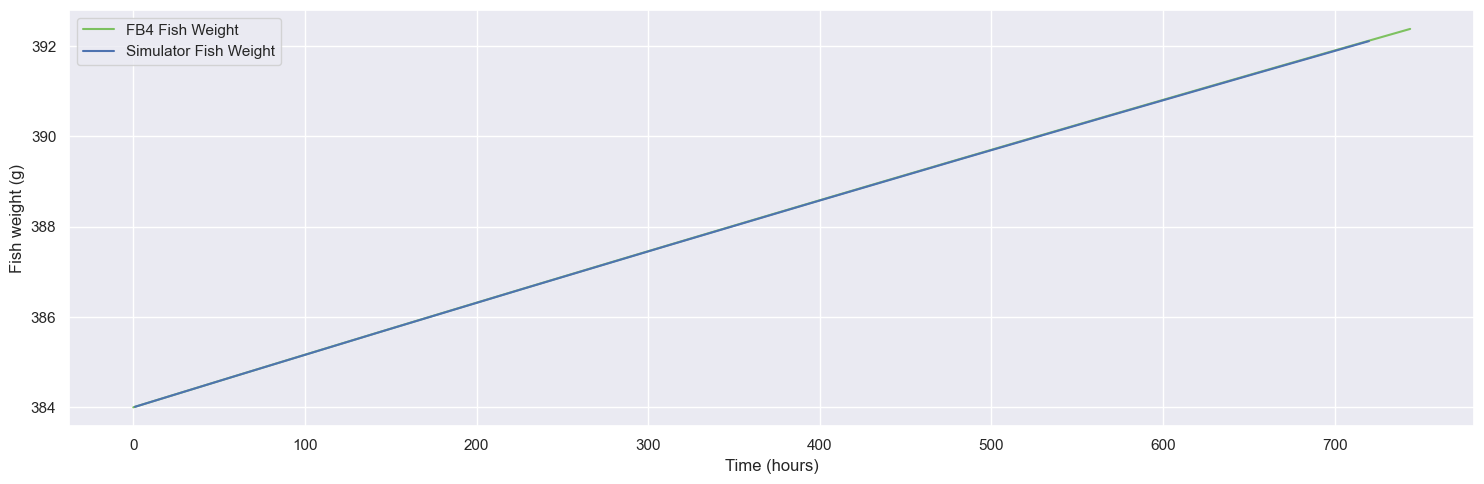

In [24]:
fig = plt.figure(figsize=(15, 5))

sns.lineplot(data=fb4_df, x='Hours', y='Weight.g', label='FB4 Fish Weight', color=food_source_color)
sns.lineplot(data=truncated_df_1, x='Step', y='AvgEnergy', label='Simulator Fish Weight', color=fish_energy_color)
plt.xlabel('Time (hours)')
plt.ylabel('Fish weight (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp4-bioenergetics-1.pdf')

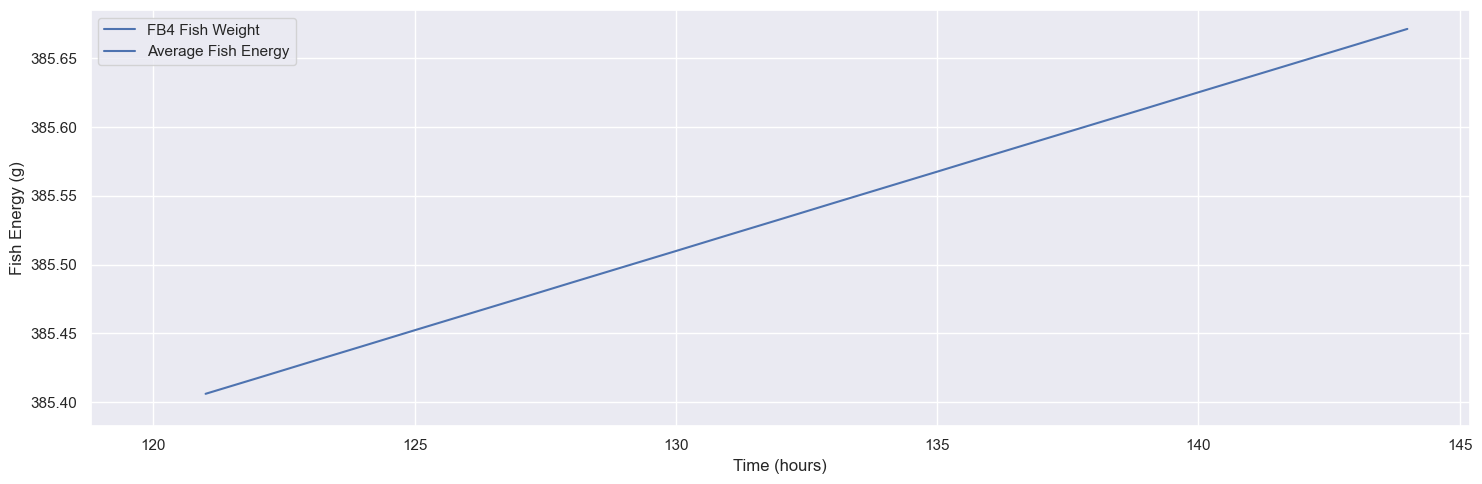

In [28]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=fb4_df[4:5], x='Hours', y='Weight.g', label='FB4 Fish Weight', ax=ax, color=food_source_color)
sns.lineplot(data=truncated_df_1[120:144], x='Step', y='AvgEnergy', ax=ax, label='Average Fish Energy', color=fish_energy_color)
plt.xlabel('Time (hours)')
plt.ylabel('Fish Energy (g)')
plt.tight_layout()
 
plt.savefig('plots/exp3-bioenergetics-zoomed.pdf')